<a href="https://colab.research.google.com/github/Khurram19/DL-Cat-vs-Dogs/blob/master/DL_Chap_2_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.9MB/s 
     |████████████████████████████████| 358kB 13.9MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 1.0MB 14.3MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 40kB 4.0MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 2.6MB 26.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [19]:
!pip install fastai

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unrar x "/content/drive/My Drive/Data Set/CAT_00.rar" "/content/drive/My Drive/Data Set/cat/"

In [4]:
fns = get_image_files('/content/drive/My Drive/Data Set/test_set/')

In [5]:
cats = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label,
 item_tfms=Resize(128))

In [6]:
get_items=get_image_files

In [7]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)

In [8]:
get_y=parent_label


In [9]:
item_tfms=Resize(128)


In [10]:
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')

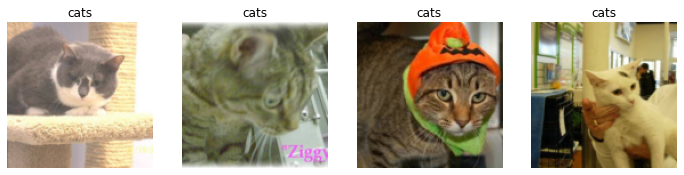

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

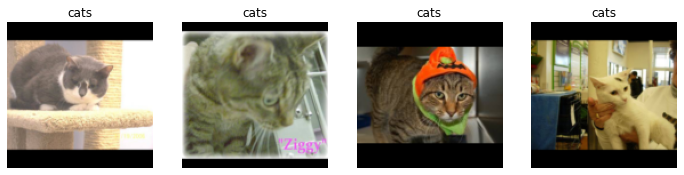

In [12]:
cats = cats.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')
dls.valid.show_batch(max_n=4, nrows=1)


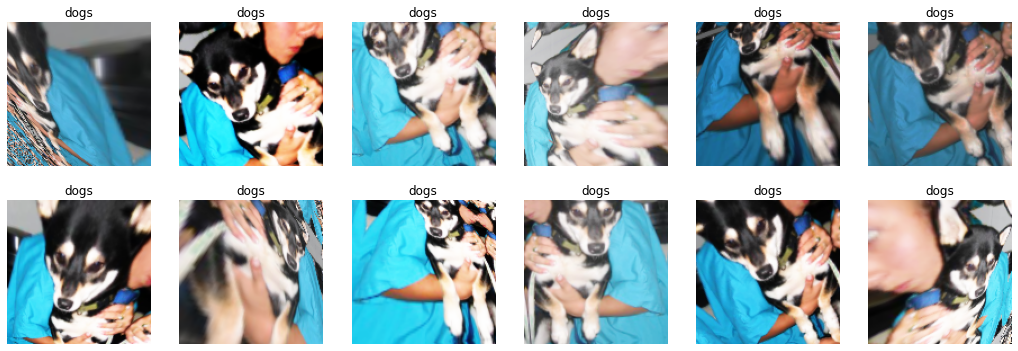

In [13]:
#DATA AUGMENTATION
cats = cats.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=3))
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')
dls.train.show_batch(max_n=12, nrows=2, unique=True)

In [54]:
#STARTING TO TRAIN DATA

In [14]:
cats = cats.new(item_tfms=RandomResizedCrop(200, min_scale=0.5), batch_tfms=aug_transforms())
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set')


In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.679987,0.244501,0.100000,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.230653,0.121561,0.025000,01:20
1,0.164096,0.153407,0.037500,01:20
2,0.151181,0.155457,0.025000,01:23
3,0.131866,0.158924,0.037500,01:21


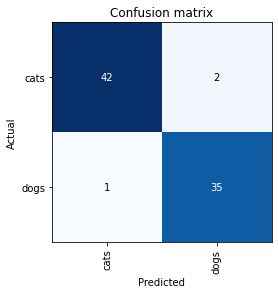

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

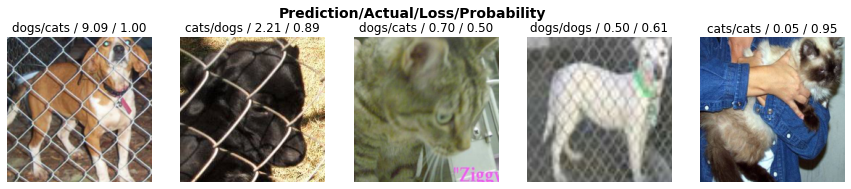

In [17]:
interp.plot_top_losses(5, nrows=1)

In [22]:
cleaner = ImageClassifierCleaner(learn)

NameError: ignored